In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [12]:
def compress_img(img_path, k=16):
    original = Image.open(img_path)
    image = np.array(original)
    
    # Reshape to 2D array of pixels (each pixel is an RGB value) 
    h, w, c = image.shape
    pixels = image.reshape(h * w, c) # (m*n, 3)
    
    # Apply KMeans to find k clusters 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # eplace each pixel with cluster centroid 
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    
    # Reshape back to the original shape
    compressed = compressed_pixels.reshape(h, w, c).astype(np.uint8)
    compressed = Image.fromarray(compressed)
    return orignal, compressed

def display_images(original, compressed, k=16):
    # Step 6: Display the original and compressed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(compressed)
    axes[1].set_title(f'Compressed Image with k={k}')
    axes[1].axis('off')
    
    plt.show()

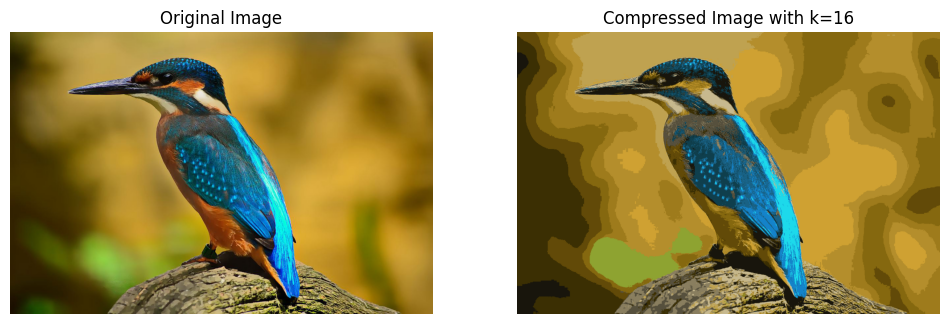

In [26]:
original_path = '../../datasets/images/test/bird.jpg'
a, b = compress_img(original_path)
display_images(a, b)

In [27]:
compressed_path = '../../datasets/images/test/compressed_bird.jpg'
b.save(compressed_path)

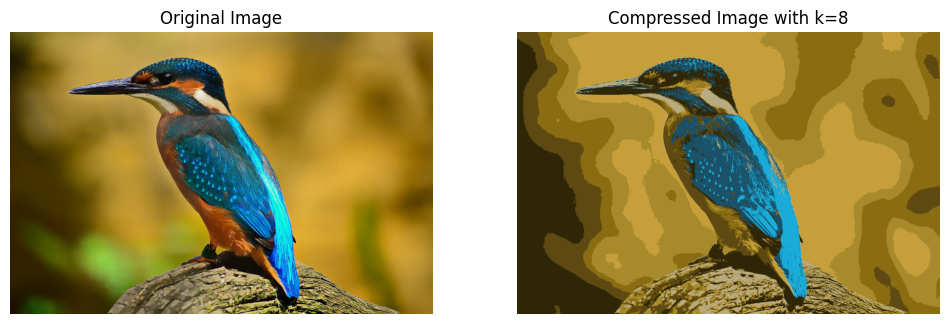

In [29]:
# 8 colors
a, b = compress_img(original_path, k=8)
display_images(a, b, k=8)

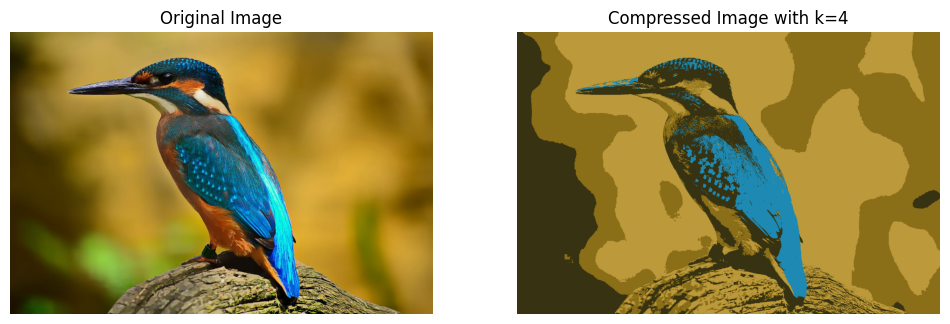

In [30]:
# 4 colors
a, b = compress_img(original_path, k=4)
display_images(a, b, k=4)

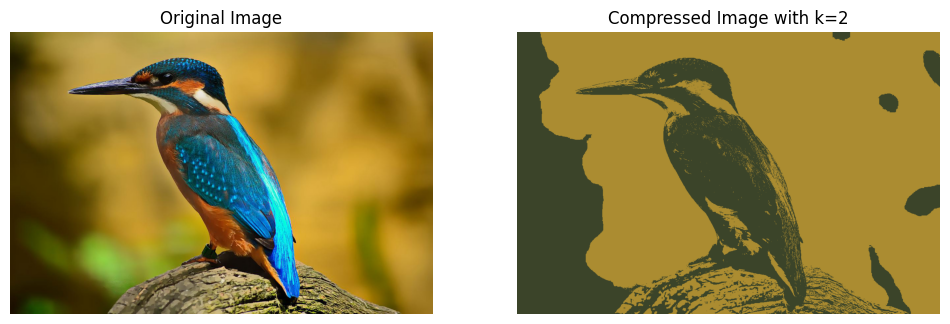

In [31]:
# 2 colors
a, b = compress_img(original_path, k=2)
display_images(a, b, k=2)